# Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Domain:
Banking

# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

# Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default : has credit in default? (categorical:'no','yes','unknown')
6. balance : average yearly balance, in euros (numeric)
7. housing : has housing loan? (categorical:'no','yes','unknown')
8. loan : has personal loan? (categorical: 'no','yes','unknown')
9. contact : contact communication type (categorical:'cellular','telephone')
10. day : last contact day of the month (numeric 1 -31)
11. month : last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
12. duration : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign : number of contacts performed during this campaign and for this client (numeric, includes lastcontact)
14. pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous : number of contacts performed before this campaign and for this client (numeric)
16. poutcome : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target : has the client subscribed a term deposit? (binary:"yes","no")

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 2. Read the data as a data frame

In [2]:
df = pd.read_csv("d:\\bank-full.csv")

#reading 5 lines from head  
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<b>Observation : </b> Here "Target" column is our dependent variable

#### 3. Performing basic EDA

In [3]:
## shape of data 
df.shape

(45211, 17)

<b>Observation :</b> Dataframe has 45211 rows and 17 columns

In [4]:
df[['Target']].groupby(['Target']).size()

Target
no     39922
yes     5289
dtype: int64

<b>Observation :</b> Data is not well distributed so it will predict better clients who will not subscribe a term deposit than who will subscribe

In [5]:
## Data type of each attribute
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
## c. Checking the presence of missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<b>Observation :</b>  there is no missing value inside dataset

In [7]:
## 5 point summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
## Account with -ve balance
df[df['balance']<0].balance.count()

3766

<b>Observation :</b>  
    i)   Mean age is approx 41. Min age is 18 and Max age is 95, <br>
    ii)  We can see -ve value for balance attribute and total count of -ve balance is 3766, also standard deviation of balance is high so it is heavily distributed accross dataset <br>
    iii) As data information said duration is highly correlated with term deposit account opening so it is better to drop this column <br>
    iv)  Also most of our data is categorical not numeric <br>

In [9]:
## finding unique data
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

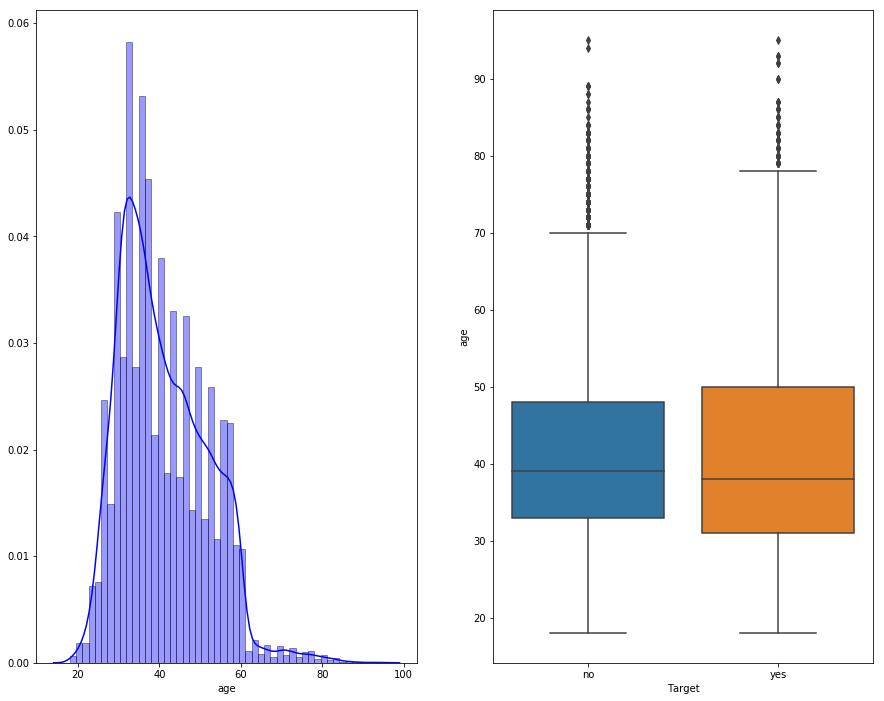

In [10]:
## some insights of age variable 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,12))
g=sns.distplot(df['age'],hist=True,kde=True,color='blue',hist_kws={'edgecolor' : 'black'}, ax = ax1)
f=sns.boxplot(x=df['Target'],y=df['age'],ax = ax2)
plt.show()

<b>Observation :</b>  age is highly disperse and there is no such differece in age group of customers who have subscribed term account and who haven't.

In [11]:
## details of Job variable 
df[['job']].groupby(['job']).size().sort_values(ascending=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64

<b>Observation :</b> highest number of customers are blue-collar professional

In [12]:
crosstab = pd.crosstab(df['job'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
job,,
management,8157,1301
technician,6757,840
blue-collar,9024,708
admin.,4540,631
retired,1748,516
services,3785,369
student,669,269
unemployed,1101,202
self-employed,1392,187


<b>Observation :</b> Management professionals are highest term account subscriber 

In [13]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862444,0.137556
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889430,0.110570
services,0.911170,0.088830


<b>Observation :</b> students are more likely to subscribe term account than other job categories

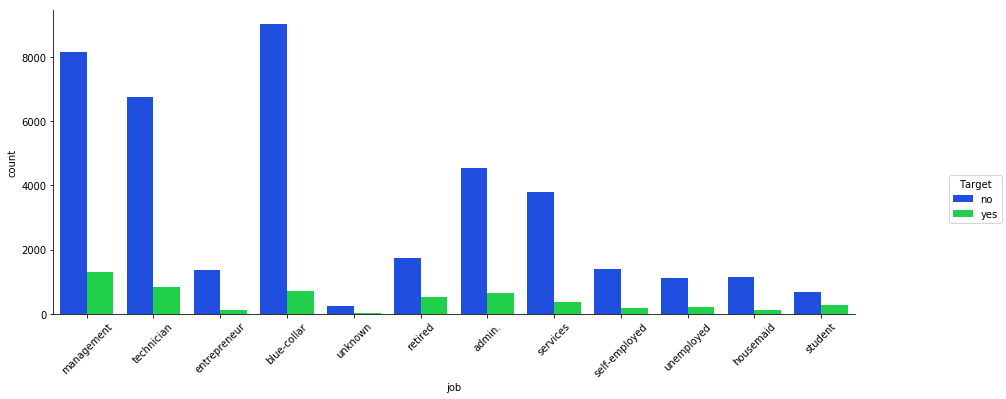

In [14]:
g=sns.factorplot(x="job", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> management professional are highest term account opener

In [15]:
## details of marital variable 
df[['marital']].groupby(['marital']).size().sort_values(ascending=False)

marital
married     27214
single      12790
divorced     5207
dtype: int64

<b>Observation :</b> highest number of customer are married 

In [16]:
crosstab = pd.crosstab(df['marital'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
marital,,
married,24459,2755
single,10878,1912
divorced,4585,622


<b>Observation :</b> highest number of term account opener are married  

In [17]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


<b>Observation :</b> singles are more likely to subscribe term account

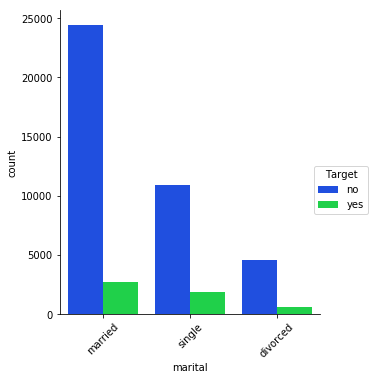

In [18]:
g=sns.factorplot(x="marital", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> above details about marital status is obvious from graph as well

In [19]:
## details of education variable 
df[['education']].groupby(['education']).size().sort_values(ascending=False)

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64

<b>Observation :</b> highet number of customer are secondary passed out 

In [20]:
crosstab = pd.crosstab(df['education'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
education,,
secondary,20752,2450
tertiary,11305,1996
primary,6260,591
unknown,1605,252


<b>Observation :</b> highest number of term account opener are secondary passed out  

In [21]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


<b>Observation :</b> tertiary passed out are more likely to subscribe term account

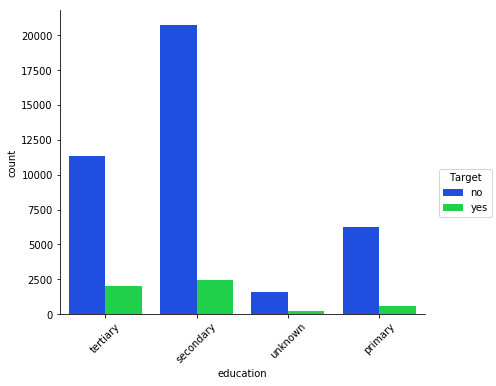

In [22]:
g=sns.factorplot(x="education", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(7)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> same is obvious from graph as well

In [23]:
## some insights about default variable 
df[['default']].groupby(['default']).size().sort_values(ascending=False)

default
no     44396
yes      815
dtype: int64

<b>Observation :</b> highet number of customer are non defaulter

In [24]:
crosstab = pd.crosstab(df['default'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
default,,
no,39159,5237
yes,763,52


<b>Observation :</b> highest number of term account opener are non defaulter  

In [25]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<b>Observation :</b> non defaulter are more likely to subscribe term account

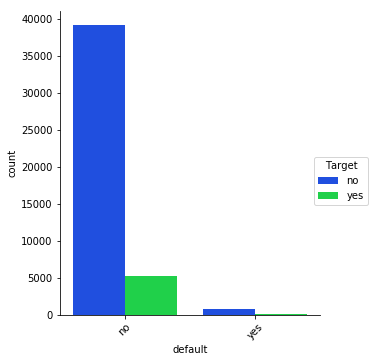

In [26]:
g=sns.factorplot(x="default", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> same is obvious from graph as well

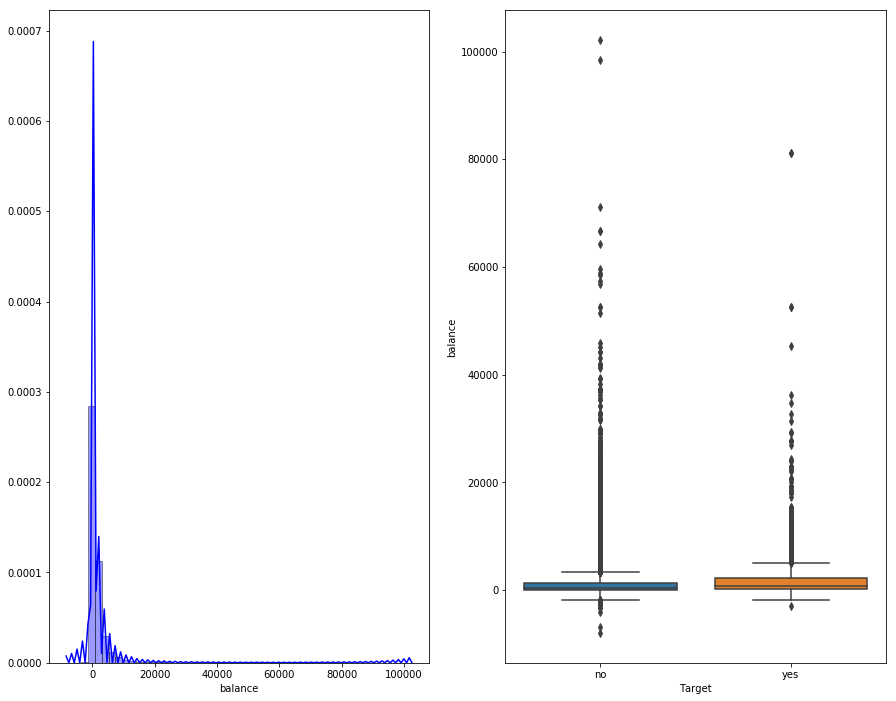

In [27]:
## some insights about balance variable 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,12))
g=sns.distplot(df['balance'],hist=True,kde=True,color='blue',hist_kws={'edgecolor' : 'black'}, ax = ax1)
f=sns.boxplot(x=df['Target'],y=df['balance'],ax = ax2)
plt.show()

<b>Observation :</b>  most of the customer are having 0 balance and there is no such differece in balance amount of customer who has subscribed term account and who hasn't.

In [28]:
## some insights about housing variable 
df[['housing']].groupby(['housing']).size().sort_values(ascending=False)

housing
yes    25130
no     20081
dtype: int64

<b>Observation :</b> most of the customers have house loan

In [29]:
crosstab = pd.crosstab(df['housing'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
housing,,
no,16727,3354
yes,23195,1935


<b>Observation :</b> most of the customers, who have subscribed term account, doesn't have house loan

In [30]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


<b>Observation :</b> customers, who doesn't have house loan, are more likely to subscribe term account

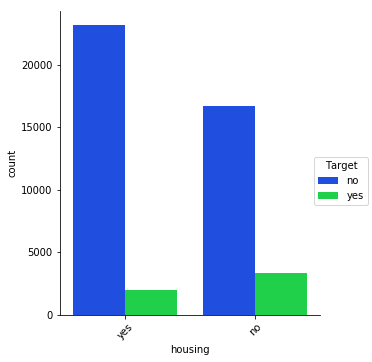

In [31]:
g=sns.factorplot(x="housing", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> same is obvious from graph as well

In [32]:
## some insights about loan variable 
df[['loan']].groupby(['loan']).size().sort_values(ascending=False)

loan
no     37967
yes     7244
dtype: int64

<b>Observation :</b> most of the customers don't have any personal loan

In [33]:
crosstab = pd.crosstab(df['loan'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
loan,,
no,33162,4805
yes,6760,484


<b>Observation :</b> highest number of customers, who have subscribed term account, doesn't have personal loan

In [34]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


<b>Observation :</b> customers, who doesn't have personal loan, are more likely to subscribe term account

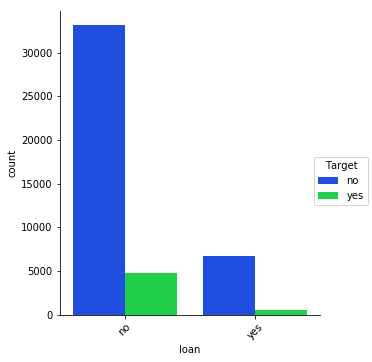

In [35]:
g=sns.factorplot(x="loan", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> same is obvious from graph as well

In [36]:
## some insights about contact variable 
df[['contact']].groupby(['contact']).size().sort_values(ascending=False)

contact
cellular     29285
unknown      13020
telephone     2906
dtype: int64

<b>Observation :</b> most number of customers have been communicated with cellular and telephone and rest of the customers are communicated with unknown source which might be email,fax,voicemail etc.

In [37]:
crosstab = pd.crosstab(df['contact'],df['Target']) 
crosstab.sort_values('yes',ascending=False)

Target,no,yes
contact,,
cellular,24916,4369
unknown,12490,530
telephone,2516,390


<b>Observation :</b> most of the customers who have subscribed term account are being communicated by cellular

In [38]:
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


<b>Observation :</b> customer who have been communicated using cellular and telephone are highly likely to subscribe term account

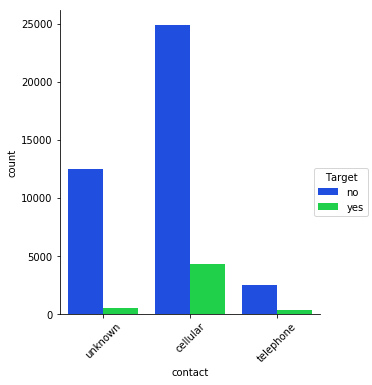

In [39]:
g=sns.factorplot(x="contact", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> same is obvious from graph as well

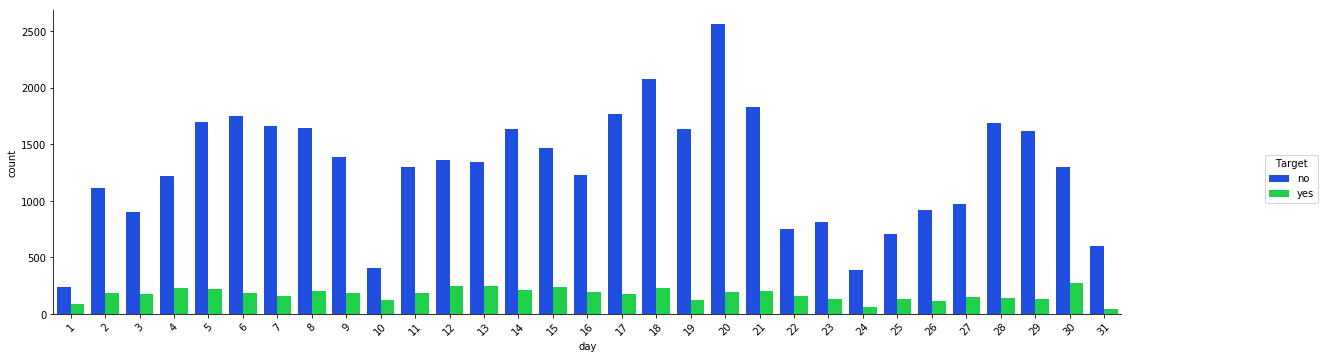

In [40]:
## some inside about day variable 
g=sns.factorplot(x="day", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> maximum calls are made on 20th of month

In [41]:
crosstab = pd.crosstab(df['day'],df['Target']) 
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
day,,
1,0.720497,0.279503
10,0.769084,0.230916
30,0.826948,0.173052
22,0.829834,0.170166
3,0.835032,0.164968
4,0.840830,0.159170
25,0.841667,0.158333
12,0.847785,0.152215
13,0.847950,0.152050


<b>Observation :</b> If customer is getting the call on 1st of month then chances of subscribing term account is maximum

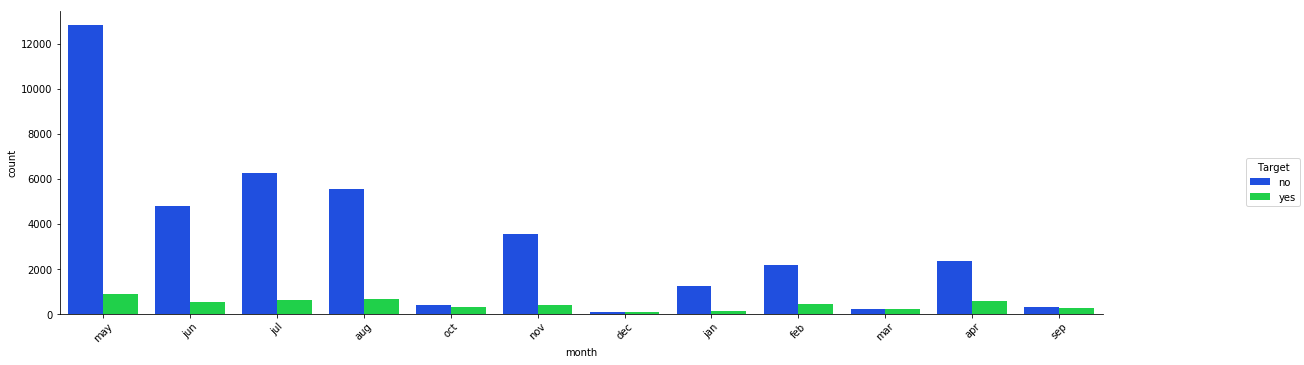

In [42]:
## some insights about month variable 
g=sns.factorplot(x="month", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> customers are getting maximum call on the month of may

In [43]:
crosstab = pd.crosstab(df['month'],df['Target']) 
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889867,0.110133
jun,0.897772,0.102228
nov,0.898489,0.101511


<b>Observation :</b> <br> 
1) If customer is getting the call on march month then chances of subscribing term account is maximum, <br>
2) also chances opening term account is very high on dec,sept and oct month compare to other months

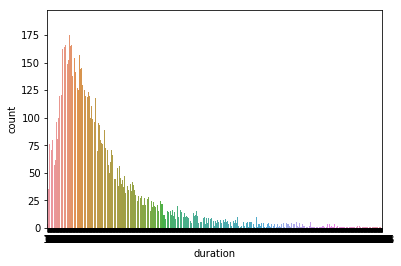

In [44]:
## some insights about duration variable 
sns.countplot(x='duration',data=df)

<b>Observation :</b> <br> 
1) duration data is highly skewed, <br>
2) also if customer didnt pick the call then he/she didnt subscribe term account, <br>
3) also at the end of the call it is obvious that he/she will subscribe the term account or not, <br>
4) we will drop this column later if we want more realistic model <br>

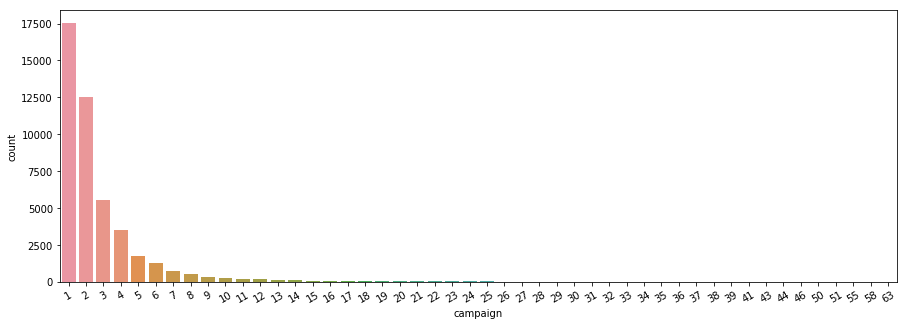

In [45]:
## some insights about campaign variable 
fig, (ax1) = plt.subplots(1, 1,figsize=(15,5))
g=sns.countplot(x='campaign',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

<b>Observation :</b> maximum number of customer has got one call during campaining

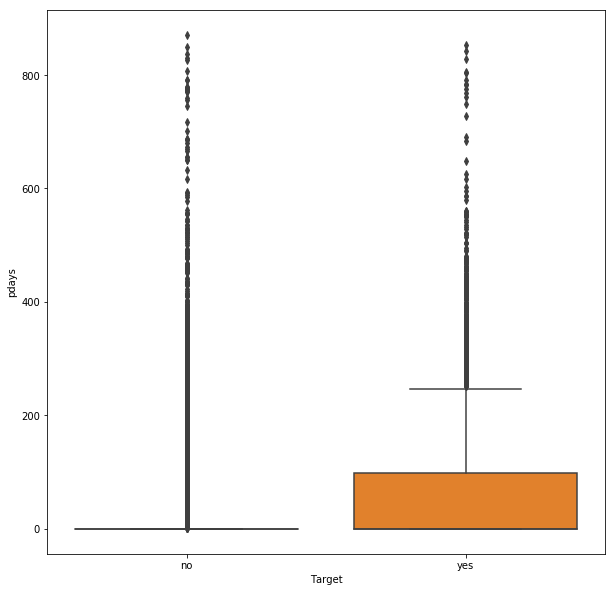

In [46]:
## some insights about pdays variable 
fig, (ax1) = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['Target'],y=df['pdays'], ax = ax1)

<b>Observation :</b> most of the customers having pday between 0 to 100 who are subscribe term account

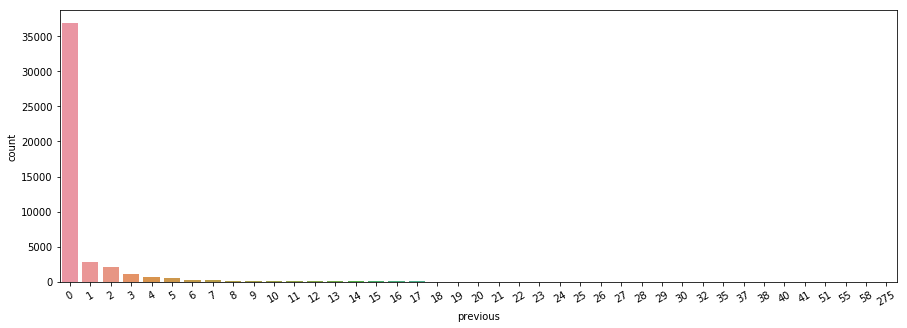

In [47]:
## some insights about previous variable 
fig, (ax1) = plt.subplots(1, 1,figsize=(15,5))
g=sns.countplot(x='previous',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

<b>Observation :</b> most of the customers didnt contacted previously

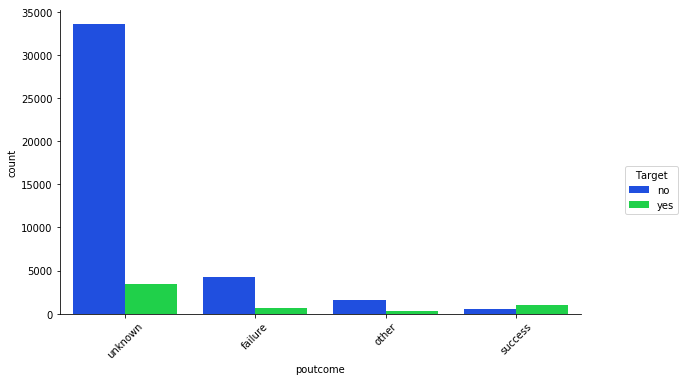

In [48]:
## some insights about poutcome variable 
g=sns.factorplot(x="poutcome", kind="count", palette="bright",hue = "Target", data=df , size = 5)
g.set_xticklabels(rotation=45)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
plt.show()

<b>Observation :</b> most of the customers' last marketing status were unknown

In [49]:
crosstab = pd.crosstab(df['poutcome'],df['Target']) 
crosstab.apply(lambda r : r/r.sum(),axis=1).sort_values('yes',ascending=False)

Target,no,yes
poutcome,,
success,0.352747,0.647253
other,0.833152,0.166848
failure,0.873903,0.126097
unknown,0.908385,0.091615


<b>Observation :</b>  Customers who have subscribed term deposit last marketing campaign then again chances of subscribing term account is very high 

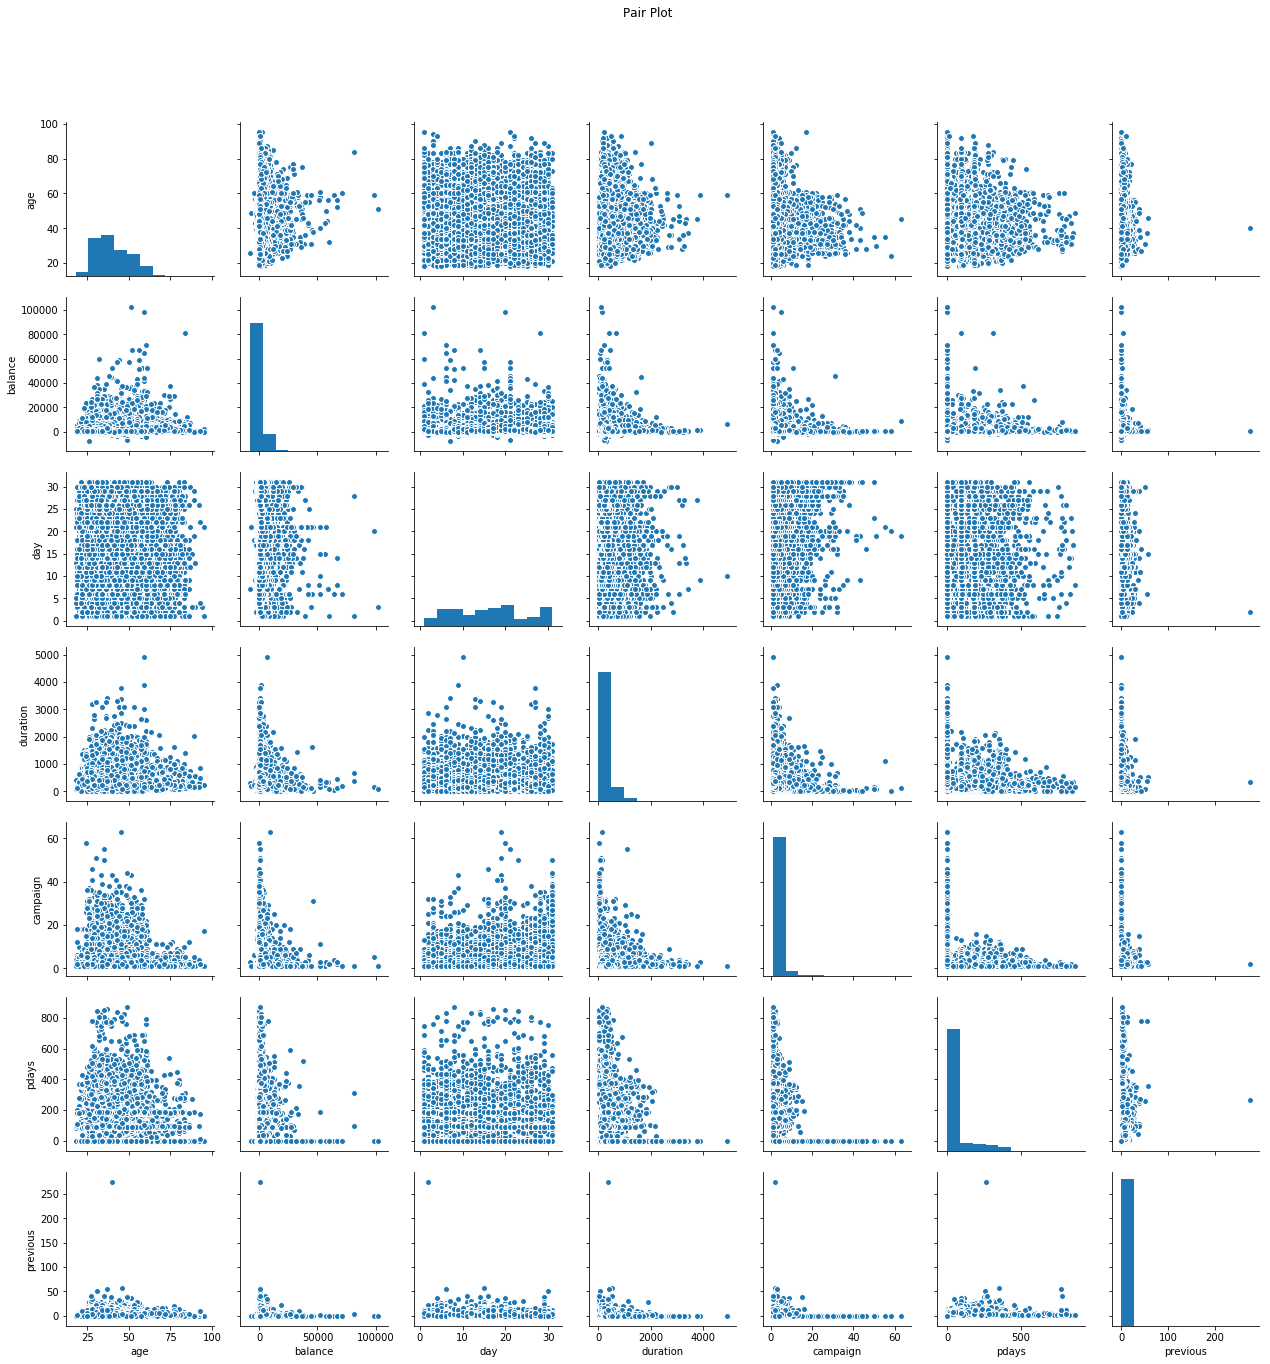

In [50]:
## i. Pair plot that includes all the columns of the data frame
g = sns.pairplot(df)
g.fig.suptitle("Pair Plot", y=1.08)
plt.show()

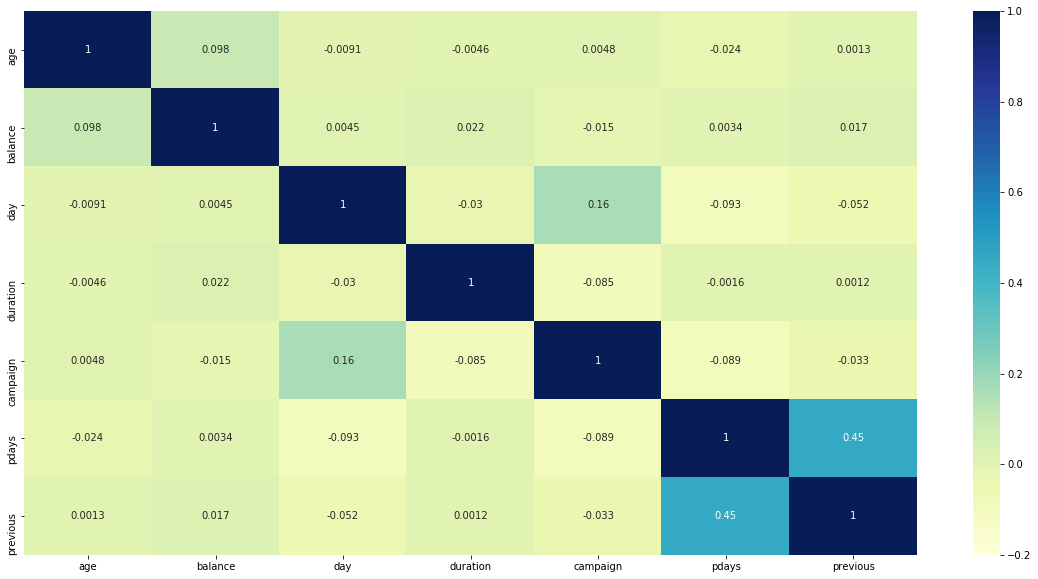

In [51]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-0.2,vmax=1)

<b>Observation :</b> from scatter plot and correlation plot it is evident that there is no strong correlation between different variable

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
df['pdays'] = df['pdays'].replace(-1,999)

In [54]:
df.loc[df.balance < 0, 'balance'] = df.balance.median()

In [55]:
df.loc[df['age'] <= 32, 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4

In [56]:
## transforming categorical variable to numeric 
from sklearn.preprocessing import LabelEncoder
catg_clmn = ['job','marital','education','default','housing','loan','contact','month','poutcome','Target']
for col in catg_clmn :
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143.0,1,0,2,5,8,261,1,999,0,3,0
1,2,9,2,1,0,29.0,1,0,2,5,8,151,1,999,0,3,0
2,2,2,1,1,0,2.0,1,1,2,5,8,76,1,999,0,3,0
3,2,1,1,3,0,1506.0,1,0,2,5,8,92,1,999,0,3,0
4,2,11,2,3,0,1.0,0,0,2,5,8,198,1,999,0,3,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null float64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: float64(1), int64(16)
memory usage: 5.9 MB


In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

#### feature selection

In [85]:
## split dataset in features and target variable
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays','previous', 'poutcome']
X = df[feature_cols] # Features

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
XS = standardScaler.fit_transform(X) # standardize the data attributes
y = df['Target'] # Target variable 

In [97]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,3,4,1,2,0,2143.0,1,0,2,5,8,1,999,0,3
1,2,9,2,1,0,29.0,1,0,2,5,8,1,999,0,3
2,2,2,1,1,0,2.0,1,1,2,5,8,1,999,0,3
3,2,1,1,3,0,1506.0,1,0,2,5,8,1,999,0,3
4,2,11,2,3,0,1.0,0,0,2,5,8,1,999,0,3


#### Dividing the training and testing data

In [61]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Spilt the data into training and test set
X_train,X_test,y_train_X,y_test_X= train_test_split(X,y,test_size=0.3,random_state=1)

#Spilt the scaled data into training and test set
XS_train,XS_test,y_train_XS,y_test_XS= train_test_split(XS,y,test_size=0.3,random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Logistic Regression :

In [62]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg_X = LogisticRegression()
logReg_X.fit(X_train,y_train_X)
y_pred_X = logReg_X.predict(X_test)

logReg_X_score_train = logReg_X.score(X_train, y_train_X)
logReg_X_score_test = logReg_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(logReg_X_score_train))
print("Test Score : ")
print("{}\n".format(logReg_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.889973773185452

Test Score : 
0.8924358596284282

The confusion matrix : 
[[11874   139]
 [ 1320   231]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.62      0.15      0.24      1551

avg / total       0.87      0.89      0.86     13564


Accuracy: 0.8924358596284282
Precision: 0.6243243243243243
Recall: 0.14893617021276595


In [63]:
## Logistic Regression with scaled data
logReg_XS = LogisticRegression()
logReg_XS.fit(XS_train,y_train_XS)
y_pred_XS = logReg_XS.predict(XS_test)

logReg_XS_score_train = logReg_XS.score(XS_train, y_train_XS)
logReg_XS_score_test = logReg_XS.score(XS_test, y_test_XS)

print("Score of the model with scaled feature variable -->  \n")
print("Traing Score : ")
print("{}\n".format(logReg_XS_score_train))
print("Test Score : ")
print("{}\n".format(logReg_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model with scaled feature variable -->  

Traing Score : 
0.8904161531898758

Test Score : 
0.893320554408729

The confusion matrix : 
[[11896   117]
 [ 1330   221]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.65      0.14      0.23      1551

avg / total       0.87      0.89      0.86     13564


Accuracy: 0.893320554408729
Precision: 0.6538461538461539
Recall: 0.14248871695680207


#### KNN : 

In [64]:
## find the best n_neighbor value for KNN

from sklearn.neighbors import KNeighborsClassifier

accuracy_list = []
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='distance', algorithm='auto')
    neigh.fit(X_train, y_train_X) 
    y_pred_X = neigh.predict(X_test)
    acc_score = float("{0:.2f}".format(accuracy_score(y_test_X,y_pred_X)*100))
    accuracy_list.append(accuracy_score(y_test_X,y_pred_X)*100)
    print("Accuracy is {}% for K-Value: {}".format(acc_score,K_value))

best_acc = float("{0:.2f}".format(max(accuracy_list)))
print("\n\nBest accuracy and K-value are {} and {}".format(best_acc,accuracy_list.index(max(accuracy_list))+1))

Accuracy is 82.06% for K-Value: 1
Accuracy is 82.56% for K-Value: 2
Accuracy is 86.24% for K-Value: 3
Accuracy is 86.38% for K-Value: 4
Accuracy is 87.5% for K-Value: 5
Accuracy is 87.58% for K-Value: 6
Accuracy is 87.92% for K-Value: 7
Accuracy is 88.09% for K-Value: 8
Accuracy is 88.18% for K-Value: 9
Accuracy is 88.21% for K-Value: 10
Accuracy is 88.3% for K-Value: 11
Accuracy is 88.28% for K-Value: 12
Accuracy is 88.31% for K-Value: 13
Accuracy is 88.29% for K-Value: 14
Accuracy is 88.37% for K-Value: 15
Accuracy is 88.28% for K-Value: 16
Accuracy is 88.3% for K-Value: 17
Accuracy is 88.28% for K-Value: 18
Accuracy is 88.31% for K-Value: 19
Accuracy is 88.36% for K-Value: 20
Accuracy is 88.45% for K-Value: 21
Accuracy is 88.4% for K-Value: 22
Accuracy is 88.47% for K-Value: 23
Accuracy is 88.48% for K-Value: 24
Accuracy is 88.51% for K-Value: 25


Best accuracy and K-value are 88.51 and 25


In [65]:
## find the best n_neighbors using gridSearchCV

from sklearn.model_selection import GridSearchCV

knn_obj = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv_X = GridSearchCV(knn_obj, param_grid, cv=5)
knn_gscv_X.fit(X_train, y_train_X)

## check best estimator
print("Best estimator using GridSearchCV : \n{}\n\n".format(knn_gscv_X.best_estimator_))

Best estimator using GridSearchCV : 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')




In [66]:
## KNN using n_neighbor == 9 
y_pred_X = knn_gscv_X.predict(X_test)

knn_gscv_X_score_train = knn_gscv_X.score(X_train, y_train_X)
knn_gscv_X_score_test = knn_gscv_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(knn_gscv_X_score_train))
print("Test Score : ")
print("{}\n".format(knn_gscv_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.8881410560242677

Test Score : 
0.8837363609554704

The confusion matrix : 
[[11883   130]
 [ 1447   104]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.89      0.99      0.94     12013
          1       0.44      0.07      0.12      1551

avg / total       0.84      0.88      0.84     13564


Accuracy: 0.8837363609554704
Precision: 0.4444444444444444
Recall: 0.0670535138620245


In [67]:
## find the best n_neighbor for scaled data

accuracy_list = []
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='distance', algorithm='auto')
    neigh.fit(XS_train, y_train_XS) 
    y_pred_XS = neigh.predict(XS_test)
    acc_score = float("{0:.2f}".format(accuracy_score(y_test_XS,y_pred_XS)*100))
    accuracy_list.append(accuracy_score(y_test_XS,y_pred_XS)*100)
    print("Accuracy is {}% for K-Value: {}".format(acc_score,K_value))

best_acc = float("{0:.2f}".format(max(accuracy_list)))
print("\n\nBest accuracy and K-value are {} and {}".format(best_acc,accuracy_list.index(max(accuracy_list))+1))

Accuracy is 84.44% for K-Value: 1
Accuracy is 84.47% for K-Value: 2
Accuracy is 86.77% for K-Value: 3
Accuracy is 87.18% for K-Value: 4
Accuracy is 87.87% for K-Value: 5
Accuracy is 88.05% for K-Value: 6
Accuracy is 88.44% for K-Value: 7
Accuracy is 88.64% for K-Value: 8
Accuracy is 88.82% for K-Value: 9
Accuracy is 88.89% for K-Value: 10
Accuracy is 88.89% for K-Value: 11
Accuracy is 88.94% for K-Value: 12
Accuracy is 89.07% for K-Value: 13
Accuracy is 89.09% for K-Value: 14
Accuracy is 89.16% for K-Value: 15
Accuracy is 89.14% for K-Value: 16
Accuracy is 89.18% for K-Value: 17
Accuracy is 89.22% for K-Value: 18
Accuracy is 89.29% for K-Value: 19
Accuracy is 89.21% for K-Value: 20
Accuracy is 89.24% for K-Value: 21
Accuracy is 89.26% for K-Value: 22
Accuracy is 89.21% for K-Value: 23
Accuracy is 89.25% for K-Value: 24
Accuracy is 89.22% for K-Value: 25


Best accuracy and K-value are 89.29 and 19


In [84]:
## KNN for scaled data

knn_XS = KNeighborsClassifier(n_neighbors = 19, weights='distance')
knn_XS.fit(XS_train, y_train_XS)
y_pred_XS = knn_XS.predict(XS_test)

knn_XS_score_train = knn_XS.score(XS_train, y_train_XS)
knn_XS_score_test = knn_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(knn_XS_score_train))
print("Test Score : ")
print("{}\n".format(knn_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.9995260214238316

Test Score : 
0.8928782070185786

The confusion matrix : 
[[11842   171]
 [ 1282   269]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.61      0.17      0.27      1551

avg / total       0.87      0.89      0.87     13564


Accuracy: 0.8928782070185786
Precision: 0.6113636363636363
Recall: 0.17343649258542876


#### Naive Bayes : 

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb_X = GaussianNB()
gnb_X.fit(X_train, y_train_X)
y_pred_X = gnb_X.predict(X_test)

gnb_X_score_train = gnb_X.score(X_train, y_train_X)
gnb_X_score_test = gnb_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(gnb_X_score_train))
print("Test Score : ")
print("{}\n".format(gnb_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.8005182165766107

Test Score : 
0.8049985255086995

The confusion matrix : 
[[10364  1649]
 [  996   555]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.91      0.86      0.89     12013
          1       0.25      0.36      0.30      1551

avg / total       0.84      0.80      0.82     13564


Accuracy: 0.8049985255086995
Precision: 0.2518148820326679
Recall: 0.3578336557059961


In [70]:
## Gaussian Naive Bayes for scaled data

gnb_XS = GaussianNB()
gnb_XS.fit(XS_train, y_train_XS)
y_pred_XS = gnb_X.predict(XS_test)

gnb_XS_score_train = gnb_XS.score(XS_train, y_train_XS)
gnb_XS_score_test = gnb_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(gnb_XS_score_train))
print("Test Score : ")
print("{}\n".format(gnb_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.7968843808259867

Test Score : 
0.8012385726924212

The confusion matrix : 
[[2757 9256]
 [ 177 1374]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.94      0.23      0.37     12013
          1       0.13      0.89      0.23      1551

avg / total       0.85      0.30      0.35     13564


Accuracy: 0.3045561781185491
Precision: 0.12925682031984947
Recall: 0.8858800773694391


#### Support Vector Machine : 

In [71]:
from sklearn.svm import SVC
svc_X = SVC(kernel = 'sigmoid')
svc_X.fit(X_train, y_train_X)
y_pred_X = svc_X.predict(X_test)

svc_X_score_train = svc_X.score(X_train, y_train_X)
svc_X_score_test = svc_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(svc_X_score_train))
print("Test Score : ")
print("{}\n".format(svc_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.8818845388188454

Test Score : 
0.8856531996461221

The confusion matrix : 
[[12013     0]
 [ 1551     0]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     12013
          1       0.00      0.00      0.00      1551

avg / total       0.78      0.89      0.83     13564


Accuracy: 0.8856531996461221
Precision: 0.0
Recall: 0.0


In [72]:
## support vector for scaled data
svc_XS = SVC(kernel = 'sigmoid',probability=True)
svc_XS.fit(XS_train, y_train_XS)
y_pred_XS = svc_XS.predict(XS_test)

svc_XS_score_train = svc_XS.score(XS_train, y_train_XS)
svc_XS_score_test = svc_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(svc_XS_score_train))
print("Test Score : ")
print("{}\n".format(svc_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.8128732581287326

Test Score : 
0.8162046593925096

The confusion matrix : 
[[10780  1233]
 [ 1260   291]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.90      0.90     12013
          1       0.19      0.19      0.19      1551

avg / total       0.81      0.82      0.82     13564


Accuracy: 0.8162046593925096
Precision: 0.19094488188976377
Recall: 0.18762088974854932


#### Decision Tree : 

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree_X = DecisionTreeClassifier(criterion = 'entropy')
dtree_X.fit(X_train, y_train_X)
y_pred_X = dtree_X.predict(X_test)

dtree_X_score_train = dtree_X.score(X_train, y_train_X)
dtree_X_score_test = dtree_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(dtree_X_score_train))
print("Test Score : ")
print("{}\n".format(dtree_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.9995260214238316

Test Score : 
0.835594219994102

The confusion matrix : 
[[10825  1188]
 [ 1042   509]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.91      0.90      0.91     12013
          1       0.30      0.33      0.31      1551

avg / total       0.84      0.84      0.84     13564


Accuracy: 0.835594219994102
Precision: 0.29994107248084856
Recall: 0.32817537072856223


In [74]:
## decision tree for scaled data
dtree_XS = DecisionTreeClassifier(criterion = 'entropy')
dtree_XS.fit(XS_train, y_train_XS)
y_pred_XS = dtree_XS.predict(XS_test)

dtree_XS_score_train = dtree_XS.score(XS_train, y_train_XS)
dtree_XS_score_test = dtree_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(dtree_XS_score_train))
print("Test Score : ")
print("{}\n".format(dtree_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.9995260214238316

Test Score : 
0.8332350339132999

The confusion matrix : 
[[10786  1227]
 [ 1035   516]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.91      0.90      0.91     12013
          1       0.30      0.33      0.31      1551

avg / total       0.84      0.83      0.84     13564


Accuracy: 0.8332350339132999
Precision: 0.29604130808950085
Recall: 0.33268858800773693


#### Random Forest :

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc_X = RandomForestClassifier(n_estimators = 50)
rfc_X.fit(X_train, y_train_X)
y_pred_X = rfc_X.predict(X_test)

rfc_X_score_train = rfc_X.score(X_train, y_train_X)
rfc_X_score_test = rfc_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(rfc_X_score_train))
print("Test Score : ")
print("{}\n".format(rfc_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.9987044585584731

Test Score : 
0.8928044824535535

The confusion matrix : 
[[11789   224]
 [ 1230   321]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     12013
          1       0.59      0.21      0.31      1551

avg / total       0.87      0.89      0.87     13564


Accuracy: 0.8928044824535535
Precision: 0.5889908256880734
Recall: 0.20696324951644102


In [88]:
## random forest for scaled data
rfc_XS = RandomForestClassifier(n_estimators = 50)
rfc_XS.fit(XS_train, y_train_XS)
y_pred_XS = rfc_XS.predict(XS_test)

rfc_XS_score_train = rfc_XS.score(XS_train, y_train_XS)
rfc_XS_score_test = rfc_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(rfc_XS_score_train))
print("Test Score : ")
print("{}\n".format(rfc_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.9988308528454514

Test Score : 
0.8950899439693306

The confusion matrix : 
[[11801   212]
 [ 1211   340]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     12013
          1       0.62      0.22      0.32      1551

avg / total       0.87      0.90      0.87     13564


Accuracy: 0.8950899439693306
Precision: 0.6159420289855072
Recall: 0.2192134107027724


#### XGBoost : 

In [77]:
from xgboost import XGBClassifier
xgb_X = XGBClassifier()
xgb_X.fit(X_train, y_train_X)
y_pred_X = xgb_X.predict(X_test)

xgb_X_score_train = xgb_X.score(X_train, y_train_X)
xgb_X_score_test = xgb_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(xgb_X_score_train))
print("Test Score : ")
print("{}\n".format(xgb_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Score of the model -->  

Traing Score : 
0.8937972003665434

Test Score : 
0.8956060159245061

The confusion matrix : 
[[11868   145]
 [ 1271   280]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.66      0.18      0.28      1551

avg / total       0.88      0.90      0.87     13564


Accuracy: 0.8956060159245061
Precision: 0.6588235294117647
Recall: 0.18052869116698905


In [89]:
## XGBoost for scaled data
xgb_XS = XGBClassifier()
xgb_XS.fit(XS_train, y_train_XS)
y_pred_XS = xgb_XS.predict(XS_test)

xgb_XS_score_train = xgb_XS.score(XS_train, y_train_XS)
xgb_XS_score_test = xgb_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(xgb_XS_score_train))
print("Test Score : ")
print("{}\n".format(xgb_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Score of the model -->  

Traing Score : 
0.8937972003665434

Test Score : 
0.8956060159245061

The confusion matrix : 
[[11868   145]
 [ 1271   280]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.66      0.18      0.28      1551

avg / total       0.88      0.90      0.87     13564


Accuracy: 0.8956060159245061
Precision: 0.6588235294117647
Recall: 0.18052869116698905


#### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbk_X = GradientBoostingClassifier()
gbk_X.fit(X_train, y_train_X)
y_pred_X = gbk_X.predict(X_test)

gbk_X_score_train = gbk_X.score(X_train, y_train_X)
gbk_X_score_test = gbk_X.score(X_test, y_test_X)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(gbk_X_score_train))
print("Test Score : ")
print("{}\n".format(gbk_X_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_X, y_pred_X)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_X, y_pred_X)))

print("Accuracy:",accuracy_score(y_test_X, y_pred_X))
print("Precision:",precision_score(y_test_X, y_pred_X))
print("Recall:",recall_score(y_test_X, y_pred_X))

Score of the model -->  

Traing Score : 
0.8951875375233039

Test Score : 
0.8953848422294308

The confusion matrix : 
[[11844   169]
 [ 1250   301]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.64      0.19      0.30      1551

avg / total       0.87      0.90      0.87     13564


Accuracy: 0.8953848422294308
Precision: 0.6404255319148936
Recall: 0.19406834300451323


In [80]:
## Gradient Boosting for scaled data
gbk_XS = GradientBoostingClassifier()
gbk_XS.fit(XS_train, y_train_XS)
y_pred_XS = gbk_XS.predict(XS_test)

gbk_XS_score_train = gbk_XS.score(XS_train, y_train_XS)
gbk_XS_score_test = gbk_XS.score(XS_test, y_test_XS)

print("Score of the model -->  \n")
print("Traing Score : ")
print("{}\n".format(gbk_XS_score_train))
print("Test Score : ")
print("{}\n".format(gbk_XS_score_test))

print("The confusion matrix : ")
print("{}\n".format(metrics.confusion_matrix(y_test_XS, y_pred_XS)))
print("The confusion matrix report : ")
print("{}\n".format(metrics.classification_report(y_test_XS, y_pred_XS)))

print("Accuracy:",accuracy_score(y_test_XS, y_pred_XS))
print("Precision:",precision_score(y_test_XS, y_pred_XS))
print("Recall:",recall_score(y_test_XS, y_pred_XS))

Score of the model -->  

Traing Score : 
0.8951875375233039

Test Score : 
0.8953848422294308

The confusion matrix : 
[[11844   169]
 [ 1250   301]]

The confusion matrix report : 
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12013
          1       0.64      0.19      0.30      1551

avg / total       0.87      0.90      0.87     13564


Accuracy: 0.8953848422294308
Precision: 0.6404255319148936
Recall: 0.19406834300451323


#### Comparison of Different Model : 

In [81]:
## Model performantion without scaling the data
all_model_accuracy = pd.DataFrame({
                'Models': ['Logistic Regression','K-Near Neighbors','Gausian NB','Support Vector Machine','Decision Tree Classifier','Random Forest Classifier',  
                              'XGBoost', 'Gradient Boosting'],
                'Score':  [logReg_X_score_test, knn_gscv_X_score_test, gnb_X_score_test, svc_X_score_test, dtree_X_score_test, rfc_X_score_test, xgb_X_score_test, gbk_X_score_test]})

all_model_accuracy.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,0.895606
7,Gradient Boosting,0.895385
0,Logistic Regression,0.892436
5,Random Forest Classifier,0.891772
3,Support Vector Machine,0.885653
1,K-Near Neighbors,0.883736
4,Decision Tree Classifier,0.835594
2,Gausian NB,0.804999


In [82]:
## Model performantion with scaling the data
all_model_accuracy = pd.DataFrame({
                'Models': ['Logistic Regression','K-Near Neighbors','Gausian NB','Support Vector Machine','Decision Tree Classifier','Random Forest Classifier',  
                              'XGBoost', 'Gradient Boosting'],
                'Score':  [logReg_XS_score_test, knn_XS_score_test, gnb_XS_score_test, svc_XS_score_test, dtree_XS_score_test, rfc_XS_score_test, xgb_XS_score_test, gbk_XS_score_test]})

all_model_accuracy.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,0.895606
7,Gradient Boosting,0.895385
0,Logistic Regression,0.893321
5,Random Forest Classifier,0.892362
1,K-Near Neighbors,0.890740
4,Decision Tree Classifier,0.833235
3,Support Vector Machine,0.816205
2,Gausian NB,0.801239


#### performance of all the models using ROC : 

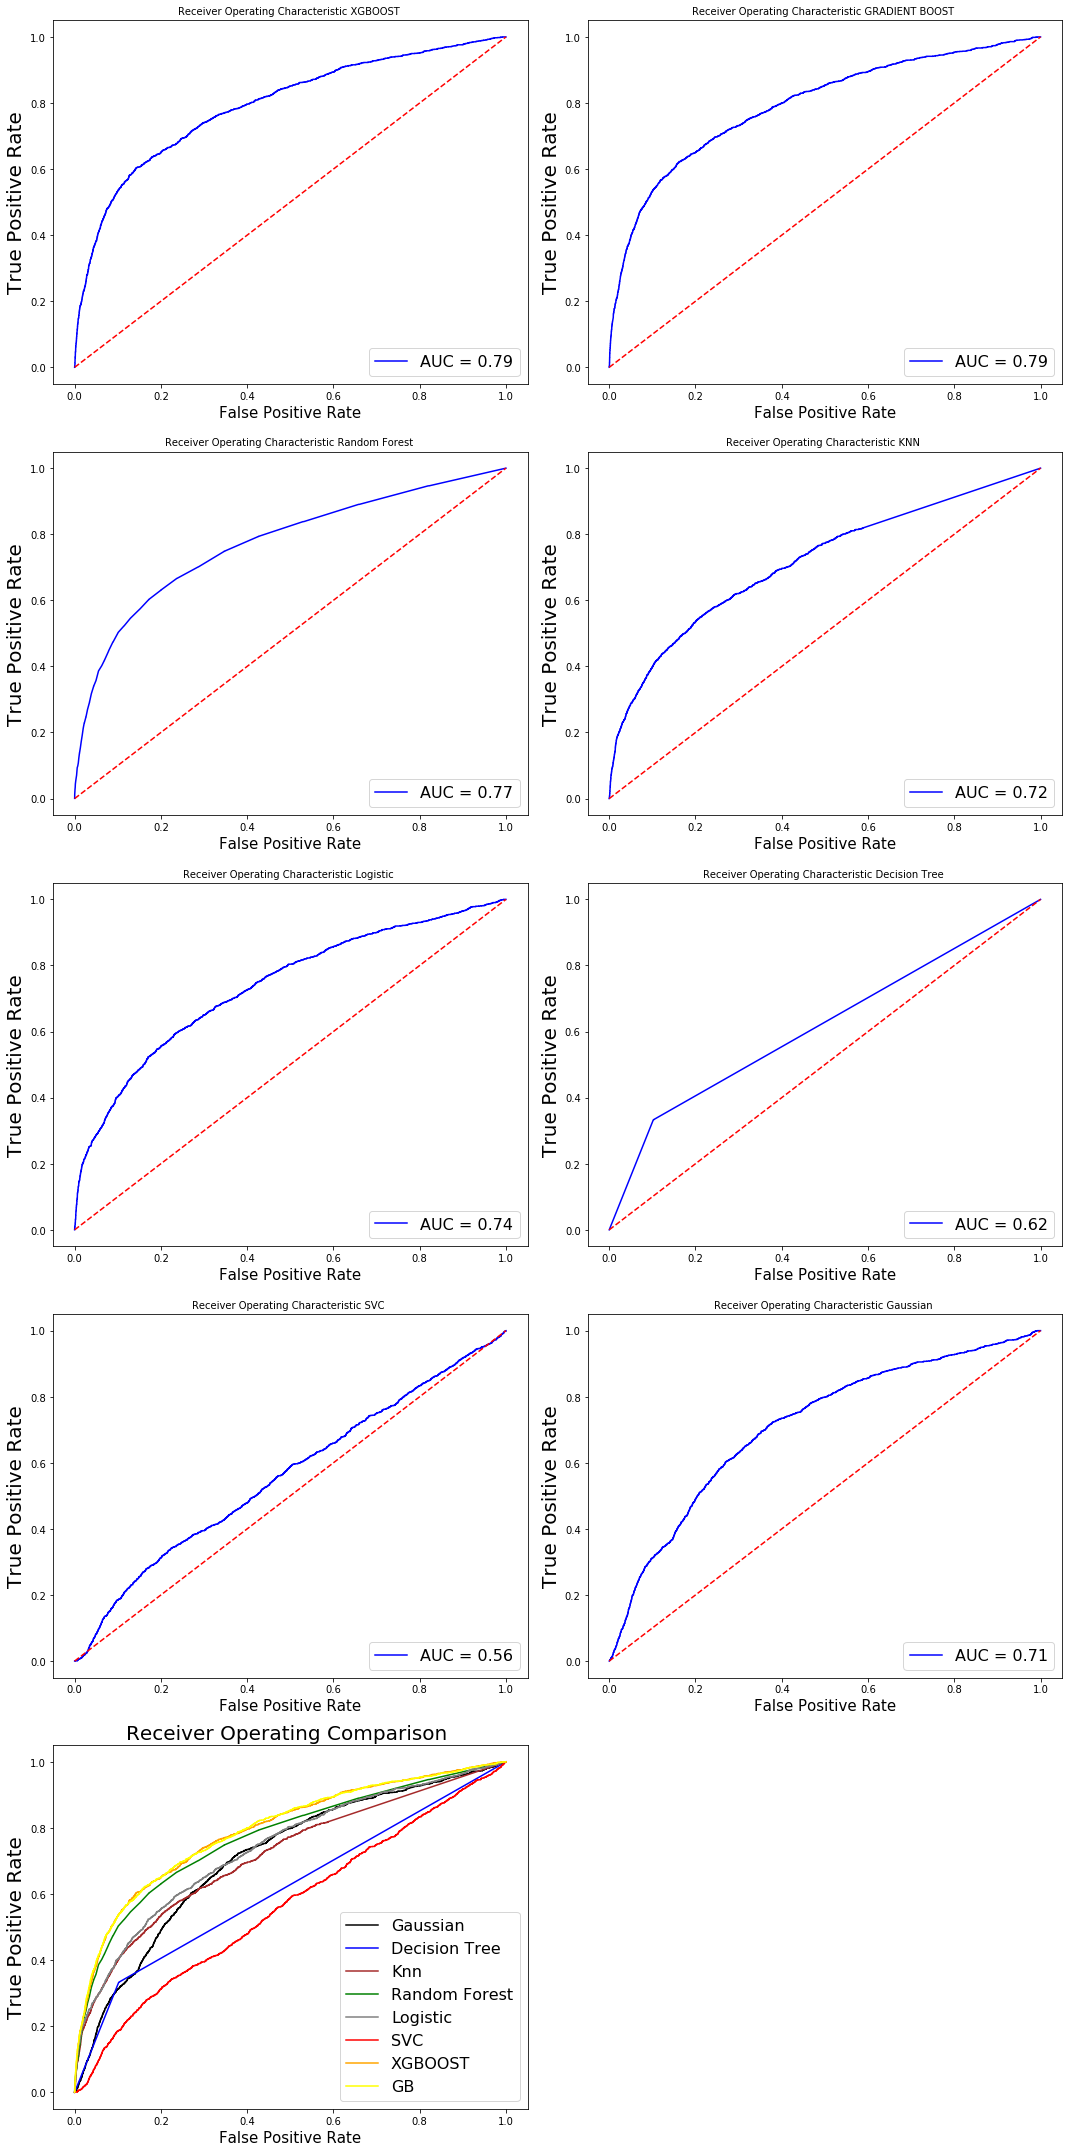

In [83]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 5, ncols = 2, figsize = (15,30))
fig.delaxes(ax_arr[4][1])

# XGBOOST
probs = xgb_XS.predict_proba(XS_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_XS, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,0].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk_XS.predict_proba(XS_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test_XS, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[0,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST
probs = rfc_XS.predict_proba(XS_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test_XS, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Random Forest ',fontsize=10)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn_XS.predict_proba(XS_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test_XS, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[1,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic KNN ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#LOGMODEL
probs = logReg_XS.predict_proba(XS_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test_XS, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[2,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=10)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE
probs = dtree_XS.predict_proba(XS_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test_XS, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[2,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=10)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})

#SVC
probs = svc_XS.predict_proba(XS_test)
preds = probs[:,1]
fprsvc, tprsvc, thresholdsvc = metrics.roc_curve(y_test_XS, preds)
roc_aucsvc = metrics.auc(fprsvc, tprsvc)

ax_arr[3,0].plot(fprsvc, tprsvc, 'b', label = 'AUC = %0.2f' % roc_aucsvc)
ax_arr[3,0].plot([0, 1], [0, 1],'r--')
ax_arr[3,0].set_title('Receiver Operating Characteristic SVC ',fontsize=10)
ax_arr[3,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[3,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[3,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN
probs = gnb_XS.predict_proba(XS_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test_XS, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[3,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[3,1].plot([0, 1], [0, 1],'r--')
ax_arr[3,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=10)
ax_arr[3,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[3,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[3,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS
ax_arr[4,0].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[4,0].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[4,0].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[4,0].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[4,0].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[4,0].plot(fprsvc, tprsvc, 'b', label = 'SVC', color='red')
ax_arr[4,0].plot(fprxgb, tprxgb, 'b', label = 'XGBOOST', color='orange')
ax_arr[4,0].plot(fprgbk, tprgbk, 'b', label = 'GB', color='yellow')
ax_arr[4,0].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[4,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[4,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[4,0].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

<b>Conclusion : </b> It is evident from avobe details that XGBoost has highest accuracy among all the models.